In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from pillar_project.data_utils.dataset import Scoreset,PillarProjectDataframe
from pillar_project.fit_utils.fit import Fit

In [3]:
dataframe = PillarProjectDataframe("/data/dzeiberg/pillar_project/dataframe/pillar_data_condensed_01_28_25.csv")

/home/dzeiberg/pillar_project/pillar_project/data_utils/dataset.py:20: DtypeWarning: Columns (4,7,8,11,15,21,22,23,29,34,37,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  self.dataframe = pd.read_csv(self.data_path)


In [4]:
scoreset = Scoreset(dataframe.dataframe[dataframe.dataframe.Dataset == "VHL_Buckley_2024"])

Q1: -3.071664782443598, Q3: 0.5687614873139571, IQR: 3.640426269757555, Lowerbound: -13.992943591716264, Upperbound: 11.490040296586622
Removing 0 outliers
Series([], Name: auth_reported_score, dtype: object)
Series([], Name: clinvar_sig, dtype: object)


In [6]:
fit = Fit(scoreset)

In [ ]:
fit.run(component_range=[3,],check_convergence=False,num_fits=1,core_limit=1)

sample counts: [195 187 423]
sample counts: [189 133 347]
sample counts: [189 133 347]
[189 133 347]
Running 1 fits for each of 1 components sequentially
Initializing model parameters...
Initialization 0...
Model parameters initialized.
Skews: [-0.52664517 -0.50480659 -0.5184512 ]
Locs: [-2.13099219 -0.59412967  0.14250715]
Scales: [0.34894217 0.344317   0.34426804]


Log-likelihood: 560.5224849:  45%|████▌     | 4542/10000 [06:41<08:03, 11.28it/s]

Log-likelihood: 560.4457368:  65%|██████▌   | 6542/10000 [09:39<05:15, 10.95it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [15]:
fit.model._log_likelihoods

[np.float64(385.0852585227024),
 np.float64(499.3054466194845),
 np.float64(525.1637441154377),
 np.float64(535.8923068238048),
 np.float64(543.0160792096227),
 np.float64(547.7349338757346),
 np.float64(550.8593210536433),
 np.float64(552.9413415755586),
 np.float64(554.3460360405827),
 np.float64(555.3095029220839),
 np.float64(555.9836218903046),
 np.float64(556.4651024234008),
 np.float64(556.8164578668998),
 np.float64(557.0779249380727),
 np.float64(557.2760095143808),
 np.float64(557.4288851787529),
 np.float64(557.5483851269549),
 np.float64(557.6430886035005),
 np.float64(557.7190999501468),
 np.float64(557.7805264647811),
 np.float64(557.8307323635005),
 np.float64(557.8720051969221),
 np.float64(557.9064030357049),
 np.float64(557.9351307206213),
 np.float64(557.9594018666427),
 np.float64(557.9799023686663)]

In [20]:
for sample_scores, sample_name in scoreset.samples:
    print(f"{sample_name} - {sample_scores.shape}, [{sample_scores.min():.3f}, {sample_scores.max():.3f}]")

Pathogenic/Likely Pathogenic - (195,), [-3.591, 0.323]
Benign/Likely Benign - (187,), [-0.963, 1.112]
gnomAD - (423,), [-3.294, 1.525]


In [7]:
import numpy as np

def empirical_cdf(x: np.ndarray):
    """
    Compute the empirical cumulative distribution function (ECDF) of a given vector.
    
    Parameters:
    x (np.ndarray): A 1D array of float values.
    
    Returns:
    tuple: Sorted data points and their corresponding ECDF values.
    """
    x_sorted = np.sort(x)
    ecdf_values = np.arange(1, len(x) + 1) / len(x)
    
    return x_sorted, ecdf_values

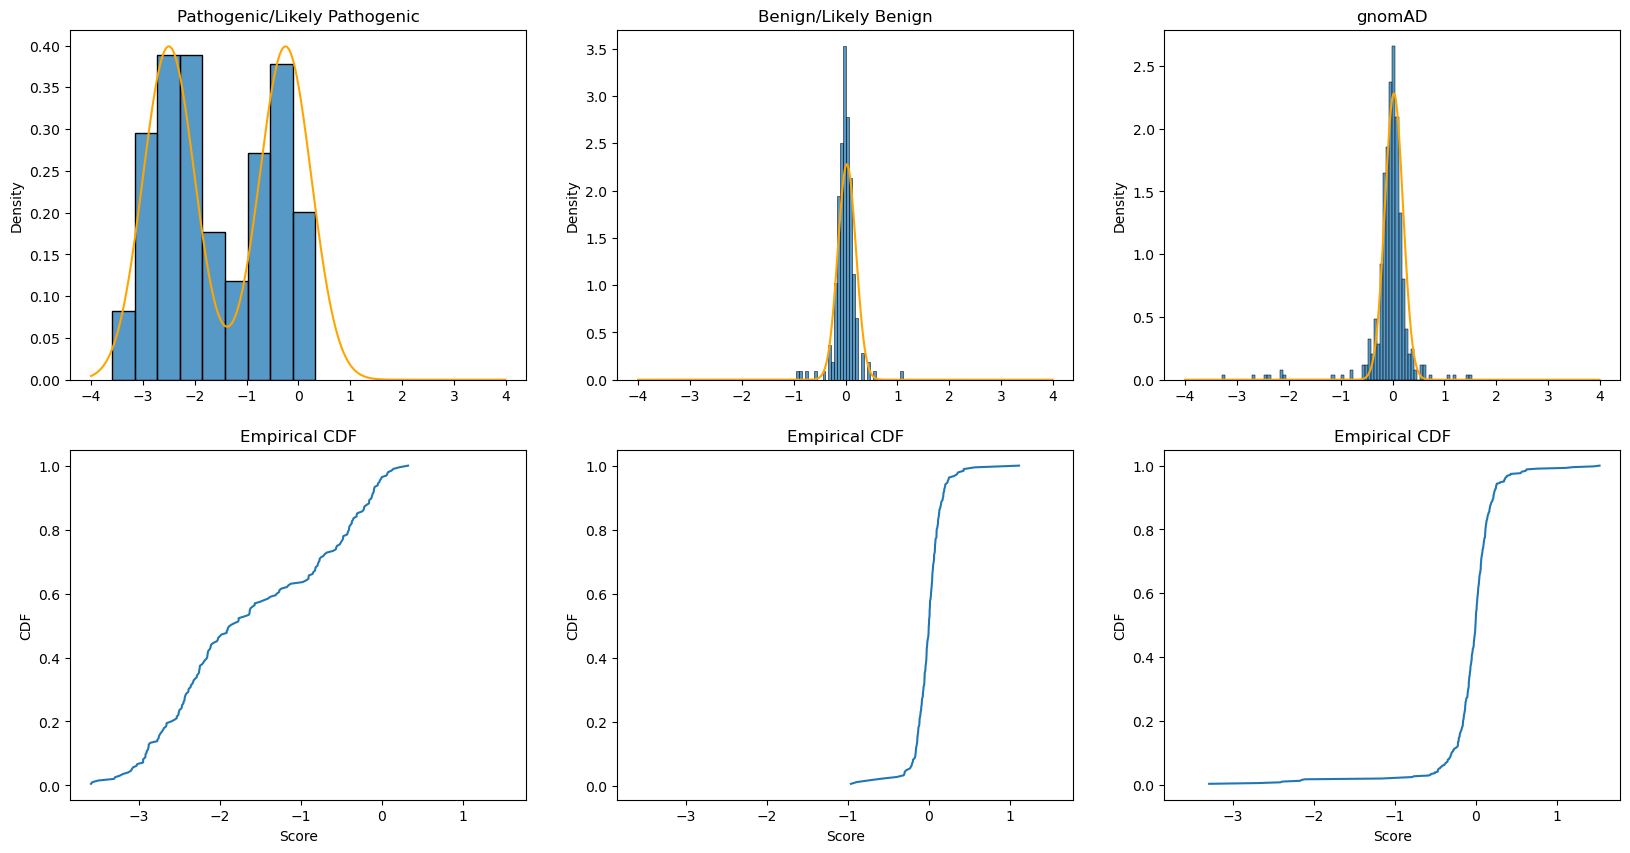

In [12]:
import scipy.stats as stats
fN = stats.skewnorm(-0.025,loc=0.0296,scale=0.175)
fA = stats.skewnorm(0,loc=-2.5,scale=.5)
fB = stats.skewnorm(0,loc=-.25,scale=.5)
fig, ax = plt.subplots(2,len(list(scoreset.samples)),figsize=(20,10),sharex='row')
for i,(sample_scores,sample_name) in enumerate(scoreset.samples):
    ss= sample_scores[(sample_scores > -5) & (sample_scores < 5)]
    # ax[0,i].hist(ss)
    sns.histplot(ss,ax=ax[0,i],stat='density')
    ax[0,i].set_title(f"{sample_name}")
    ax[1,i].plot(*empirical_cdf(sample_scores))
    ax[1,i].set_title("Empirical CDF")
    ax[1,i].set_xlabel("Score")
    ax[1,i].set_ylabel("CDF")

rng = np.linspace(-1.5,1.5,1000)
r0 = np.arange(-4,4,.01)
ax[0,0].plot(r0,fA.pdf(r0) * .5 + fB.pdf(r0) * .5,color='orange')
ax[0,-2].plot(r0,fN.pdf(r0),color='orange')
ax[0,-1].plot(r0,fN.pdf(r0),color='orange')

plt.show()

Text(0.5, 1.0, 'Middle / Normal Density ratio')

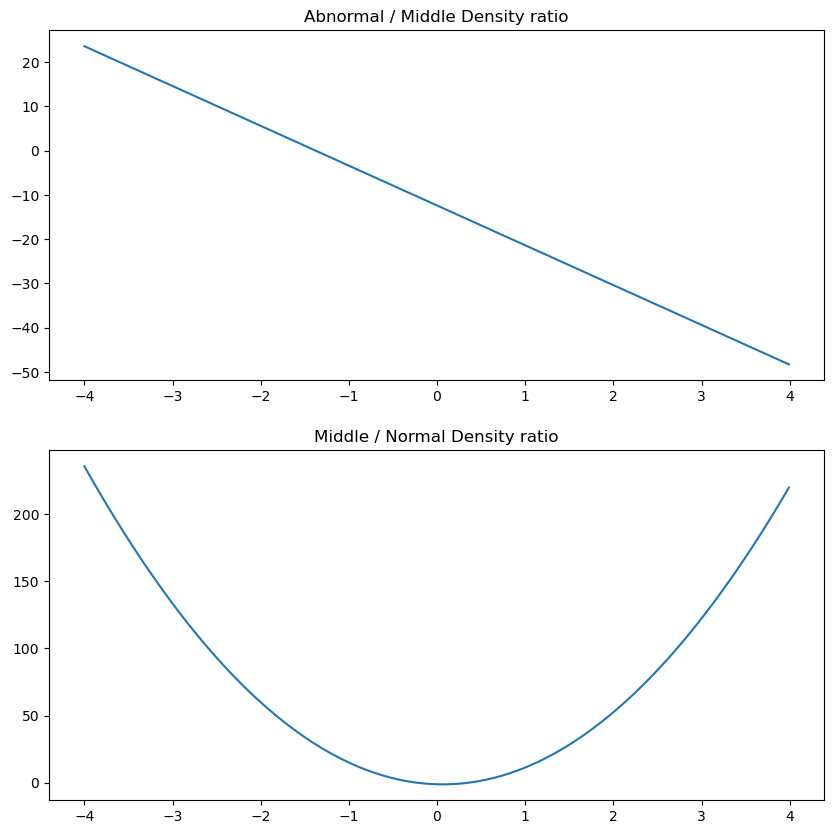

In [14]:
fig,ax = plt.subplots(2,1,figsize=(10,10))
ax[0].plot(r0,fA.logpdf(r0) - fB.logpdf(r0))
ax[0].set_title("Abnormal / Middle Density ratio")
ax[1].plot(r0,fB.logpdf(r0) - fN.logpdf(r0))
ax[1].set_title("Middle / Normal Density ratio")

In [12]:
scoreset.dataframe

,ID,Dataset,Gene,HGNC_id,Chrom,STRAND,hg19_pos,hg38_start,hg38_end,ref_allele,...,nucleotide_or_aa,MaveDB URN,Ensembl_transript_ID,Ref_seq_transcript_ID,Model_system,Assay_type,Phenotype_measured,Phenotype_detail,IGVF_produced,Flag
226706,NBN_unpublished_var151342,NBN_unpublished,NBN,7652,8,-1.0,NaN,89984500.0,89984500.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
226707,NBN_unpublished_var151343,NBN_unpublished,NBN,7652,8,-1.0,NaN,89984500.0,89984500.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
226708,NBN_unpublished_var151344,NBN_unpublished,NBN,7652,8,-1.0,NaN,89984500.0,89984500.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
226709,NBN_unpublished_var151345,NBN_unpublished,NBN,7652,8,-1.0,NaN,89984501.0,89984501.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
226710,NBN_unpublished_var151346,NBN_unpublished,NBN,7652,8,-1.0,NaN,89984501.0,89984501.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229792,NBN_unpublished_var154428,NBN_unpublished,NBN,7652,8,-1.0,NaN,89958782.0,89958782.0,G,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
229793,NBN_unpublished_var154429,NBN_unpublished,NBN,7652,8,-1.0,NaN,89958782.0,89958782.0,G,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
229794,NBN_unpublished_var154430,NBN_unpublished,NBN,7652,8,-1.0,NaN,89958783.0,89958783.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
229795,NBN_unpublished_var154431,NBN_unpublished,NBN,7652,8,-1.0,NaN,89958783.0,89958783.0,C,...,nucleotide,NaN,ENST00000265433.8,NM_002485.5,immortalized human cells,Cell viability,Cell survival,overall function,Yes,NaN
